In [1]:
import pandas as pd

In [2]:
data = pd.read_fwf("housing.data", usecols=['LSTAT','MEDV'])

In [3]:
data.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = data.LSTAT
y = data.MEDV

In [6]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
import numpy as np

In [8]:
class singleRegressor():
    def __init__ (self):
        pass
    def singleB1(self, X, y):
        a = ((X-X.mean())*(y-y.mean())).sum()
        b = ((X-X.mean())*(X-X.mean())).sum()
        return a/b

    def singleB0(self, X, y, b1):
        return y.mean() -(b1*X.mean())
    
    def fit(self, X, y):
        self.b1 = self.singleB1(X,y)
        self.b0 = self.singleB0(X, y, self.b1)
        
    def predict(self,x):
        return self.b0 + self.b1*x

In [9]:
r = singleRegressor()

In [10]:
r.fit(X_train,y_train)

In [11]:
y_predict = r.predict(X_test)

In [12]:
import math

In [13]:
def RSS(y_true, y_predict):
    return  np.sum((y_true-y_predict)*(y_true-y_predict))

In [14]:
def RSE(y_true, y_predict):
    return math.sqrt((1/(y_true.shape[0] - 2)) * RSS(y_true, y_predict))

In [15]:
def R2(y_true, y_predict):
    return 1 - RSS(y_true, y_predict)/(np.sum((y_true - y_true.mean()) * (y_true - y_true.mean())))

In [16]:
def MSE(y_true, y_predict):
    return np.sum((y_true-y_predict)**2)/y_true.shape[0]

In [17]:
print('MSE = ', MSE(y_test, y_predict))
print('R2 = ',R2(y_test, y_predict))

MSE =  46.33630536002598
R2 =  0.4309567284618754


In [18]:
import matplotlib.pyplot as plt

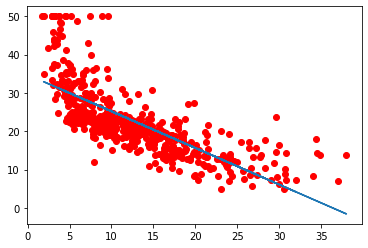

In [19]:
plt.plot(data.LSTAT,data.MEDV, 'ro')
plt.plot(X_test,y_predict)
plt.show()

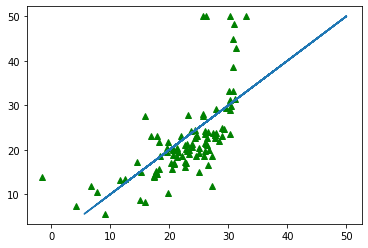

In [20]:
plt.plot(y_predict,y_test ,'g^')
plt.plot(y_test,y_test)
plt.show()

In [21]:
data_2 = data

In [22]:
data_2['LSTAT2'] = data.LSTAT**2

In [23]:
X_ = data_2[['LSTAT','LSTAT2']]
y_ = data_2.MEDV

In [24]:
class multipleRegressor():
    def __init__(self):
        pass
    
    def fit(self, X, y):
        ones = np.ones(X.shape[0])
        T = np.array([ones]).T
        M = np.concatenate((T, X), axis = 1)
        B = np.linalg.inv((M.T).dot(M))
        A = (B.dot(M.T)).dot(y)
        self.b = A
        
    def predict(self, X):
        bias = np.ones((X.shape[0],1))
        X = np.concatenate( (bias,X),axis=1)
        _y = np.zeros(X.shape[0])
        for i,x in enumerate(X):
            _y[i] = sum(self.b * x)
        return _y

In [25]:
mr = multipleRegressor()

In [26]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [27]:
mr.fit(X_train_,y_train_)

In [28]:
y_predict_ = mr.predict(X_test_)

a

In [30]:
print('MSE = ', MSE(y_test_, y_predict_))
print('R2 = ',R2(y_test_, y_predict_))

MSE =  27.362831478640285
R2 =  0.626872768600804


b

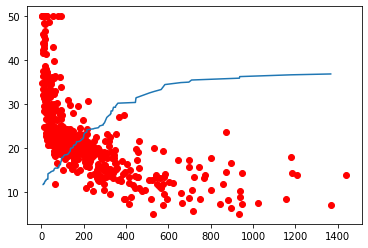

In [31]:
plt.plot(X_.LSTAT2,y_, 'ro')
plt.plot(sorted(X_test_.LSTAT2), sorted(y_predict_))
plt.show()

In [32]:
y_test_.shape

(102,)

In [33]:
y_predict_.shape

(102,)

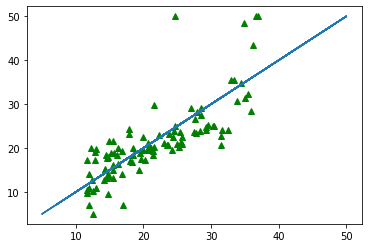

In [35]:
plt.plot(y_predict_ ,y_test_ ,'g^')
plt.plot(y_test_,y_test_)
plt.show()

In [36]:
data_3 = data

In [37]:
data_3['LSTAT3'] = data.LSTAT**3

In [40]:
X_1 = data_3[['LSTAT','LSTAT3']]
y_1 = data_3.MEDV

In [39]:
mr1 = multipleRegressor()

In [41]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [42]:
mr.fit(X_train_1,y_train_1)

In [44]:
y_predict_1= mr.predict(X_test_1)

In [45]:
print('MSE = ', MSE(y_test_1, y_predict_1))
print('R2 = ',R2(y_test_1, y_predict_1))

MSE =  28.803072859842235
R2 =  0.607233233871588


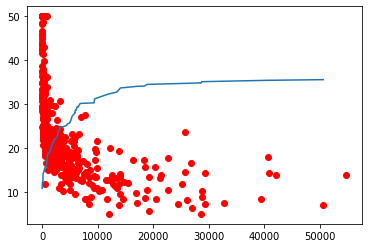

In [47]:
plt.plot(X_.LSTAT3,y_, 'ro')
plt.plot(sorted(X_test_1.LSTAT3), sorted(y_predict_1))
plt.show()

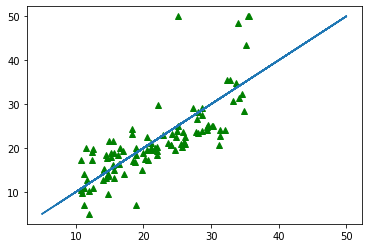

In [49]:
plt.plot(y_predict_1 ,y_test_1 ,'g^')
plt.plot(y_test_1,y_test_1)
plt.show()